### LOAD DATA

In [8]:
import csv # for csv file import
import numpy as np
import os
import cv2

In [9]:
def get_file_data(file_path, header=False):
    # function to read in data from driving_log.csv
    
    lines = []
    with open(file_path + '/driving_log.csv') as csvfile:
        reader = csv.reader(csvfile)
        # if header is set to true then skip first line of csv
        if header:
            # if header exists iterate to next item in list, returns -1 if exhausted
            next(reader, -1)
        for line in reader:
            # loop through reader appending each line to lines array
            lines.append(line)
    return lines


centre_camera = 0    
left_camera = 1
right_camera = 2
steering_angle = 3



new_x = get_file_data('./my_driving')
udacity_x = get_file_data('./data')


In [10]:
steering_angles = []
camera_images = []

source_path = './my_driving/IMG/'

for line in new_x[0:]:

    # get steering angle from csv 4th element of CSV and cast as float for this point in time
    #measurement = float(line[3])
    steering_centre = float(line[steering_angle])

    # create adjusted steering measurements for the side camera images
    correction = 0.25  # this is a parameter to tune
    steering_left = steering_centre + correction
    steering_right = steering_centre - correction

    img_centre = cv2.imread(source_path + line[centre_camera].split('/')[-1])
    img_left = cv2.imread(source_path + line[left_camera].split('/')[-1])
    img_right = cv2.imread(source_path + line[right_camera].split('/')[-1])

    #img_centre_hsv = cv2.cvtColor(img_centre, cv2.COLOR_BGR2HSV)
    #img_left_hsv = cv2.cvtColor(img_left, cv2.COLOR_BGR2HSV)
    #img_right_hsv = cv2.cvtColor(img_right, cv2.COLOR_BGR2HSV)
    
    #img_centre_yuv = cv2.cvtColor(img_centre, cv2.COLOR_BGR2YUV)
    #img_left_yuv = cv2.cvtColor(img_left, cv2.COLOR_BGR2YUV)
    #img_right_yuv = cv2.cvtColor(img_right, cv2.COLOR_BGR2YUV)

    # add images and angles to data set
    camera_images.append(img_centre)
    camera_images.append(img_left)
    camera_images.append(img_right)

    steering_angles.append(steering_centre)
    steering_angles.append(steering_left)
    steering_angles.append(steering_right)


In [11]:
# convert arrays to numpy arrays for keras
X_train = np.array(camera_images)
y_train = np.array(steering_angles)


print(X_train[1].shape)

(160, 320, 3)


In [19]:
my_timestamps = []
my_ms_timestamp = []
my_steering_angles = []

for y in new_x[0:6000]:
    my_steering_angles.append(np.float((y[steering_angle])))
    # add file name from centre camerea image to get timestamp
    my_timestamps.append(y[centre_camera].split('/')[-1])
    
    # get the file name from centre camera image with no file extension
    filename_noext = (os.path.splitext(os.path.basename(y[centre_camera]))[0])
    # extract hours, mins, secs and msecs from filename
    h_m_s_ms = filename_noext.split('_')[-4:]
    
    # process time to msecs
    mins = np.float(h_m_s_ms[0]) * 60 + np.float(h_m_s_ms[1])
    secs = mins * 60 + np.float(h_m_s_ms[2])
    msecs = secs * 1000 + np.float(h_m_s_ms [3])
    
    # append msecs to array
    my_ms_timestamp.append(int(msecs))

# create numpy array from array
np_my_steering_angles = np.array(my_steering_angles)


udacity_steering_angles = []
udacity_timestamps = []
udacity_ms_timestamp = []

for y in udacity_x[0:6000]:
    udacity_steering_angles.append(np.float((y[steering_angle])))
    
    # add file name from centre camerea image to get timestamp
    udacity_timestamps.append(y[centre_camera].split('/')[-1])
    
    # get the file name from centre camera image with no file extension
    filename_noext = (os.path.splitext(os.path.basename(y[centre_camera]))[0])
    # extract hours, mins, secs and msecs from filename
    h_m_s_ms = filename_noext.split('_')[-4:]
    
    # process time to msecs
    mins = np.float(h_m_s_ms[0]) * 60 + np.float(h_m_s_ms[1])
    secs = mins * 60 + np.float(h_m_s_ms[2])
    msecs = secs * 1000 + np.float(h_m_s_ms [3])
    
    # append msecs to array
    udacity_ms_timestamp.append(int(msecs))

# create numpy array from array
np_udacity_steering_angles = np.array(udacity_steering_angles)

my_ms_timestamp_norm = ([my_ms_timestamp[i+1]- my_ms_timestamp[i] for i in range(len(my_ms_timestamp)-1)])
my_ms_timestamp_norm.insert(0,0)
my_ms_timestamp_norm_cum = np.cumsum(my_ms_timestamp_norm)

udacity_ms_timestamp_norm = ([udacity_ms_timestamp[i+1]- udacity_ms_timestamp[i] for i in range(len(udacity_ms_timestamp)-1)])
udacity_ms_timestamp_norm.insert(0,0)
udacity_ms_timestamp_norm_cum = np.cumsum(udacity_ms_timestamp_norm)

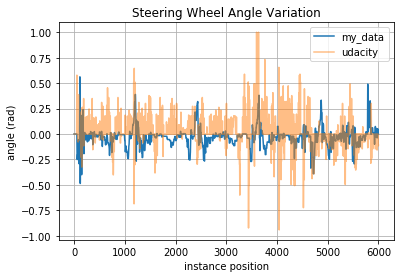

In [20]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.plot(np_my_steering_angles, label='my_data' )
plt.plot(udacity_steering_angles, label='udacity',alpha=0.5)
plt.legend()
plt.xlabel('instance position')
plt.ylabel('angle (rad)')
plt.title('Steering Wheel Angle Variation')
plt.grid(True)

plt.savefig("udacity_compare.png")

plt.show()




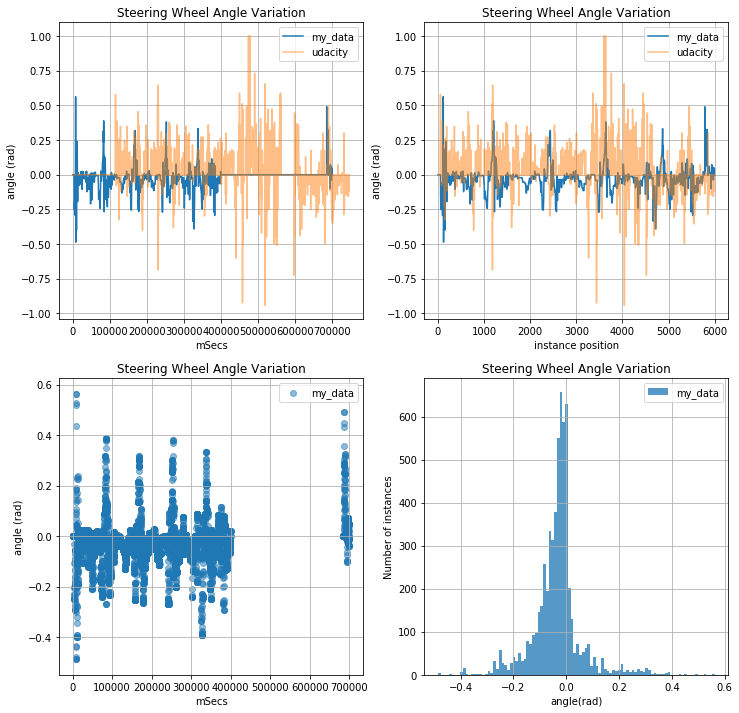

In [21]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

fig = plt.figure(figsize=(12,12))


ax1 = plt.subplot(2, 2, 1)

plt.plot(my_ms_timestamp_norm_cum, np_my_steering_angles, label='my_data')
plt.plot(udacity_ms_timestamp_norm_cum, udacity_steering_angles, label='udacity', alpha=0.5)
plt.legend()
plt.xlabel('mSecs')
plt.ylabel('angle (rad)')
plt.title('Steering Wheel Angle Variation')
plt.grid(True)

ax2 = plt.subplot(2, 2, 2)

plt.plot(np_my_steering_angles, label='my_data' )
plt.plot(udacity_steering_angles, label='udacity',alpha=0.5)
plt.legend()
plt.xlabel('instance position')
plt.ylabel('angle (rad)')
plt.title('Steering Wheel Angle Variation')
plt.grid(True)

ax3 = plt.subplot(2, 2, 3)
#plt.scatter(udacity_ms_timestamp_norm_cum, udacity_steering_angles, label='udacity')
plt.scatter(my_ms_timestamp_norm_cum, np_my_steering_angles, label='my_data', alpha=0.5)
plt.legend()
plt.xlabel('mSecs')
plt.ylabel('angle (rad)')
plt.title('Steering Wheel Angle Variation')
plt.grid(True)

ax4 = plt.subplot(2, 2, 4)
#plt.scatter(udacity_ms_timestamp_norm_cum, udacity_steering_angles, label='udacity')
#plt.hist(my_ms_timestamp_norm_cum, my_steering_angles, label='my_data')

plt.hist(np_my_steering_angles, 100, alpha=0.75, label='my_data' )
plt.legend()
plt.xlabel('angle(rad)')
plt.ylabel('Number of instances')
plt.title('Steering Wheel Angle Variation')
plt.grid(True)


#plt.savefig("test.png")

plt.show()

In [22]:
import math

instance_count = len(np_my_steering_angles)
num_zeros = ((np_my_steering_angles == 0.0) & (np_my_steering_angles == -0.0)).sum()
num_near_zero = ((np_my_steering_angles < 0.0174) & (np_my_steering_angles > -0.0174)).sum()
num_left = (np_my_steering_angles < 0.0).sum()
num_right = (np_my_steering_angles > 0.0).sum()

deg = math.degrees(0.0174)
rad = math.radians(1)

print("Total number of steering instances: {0}".format(instance_count))
print("Number of instances with 0 as steering Angle: {0} ({1:.2f}%)".format(num_zeros, (num_zeros/instance_count)*100))
print("Number of instances < +/-1 degree as steering Angle: {0} ({1:.2f}%)".format(num_near_zero, (num_near_zero/instance_count)*100))
print("Number of instances with left steering Angle: {0} ({1:.2f}%)".format(num_left, (num_left/instance_count)*100))
print("Number of instances with right steering Angle: {0} ({1:.2f}%)".format(num_right, (num_right/instance_count)*100))

Total number of steering instances: 6000
Number of instances with 0 as steering Angle: 81 (1.35%)
Number of instances < +/-1 degree as steering Angle: 1602 (26.70%)
Number of instances with left steering Angle: 4649 (77.48%)
Number of instances with right steering Angle: 1270 (21.17%)


In [24]:
import math

udacity_instance_count = len(np_udacity_steering_angles)
udacity_num_zeros = ((np_udacity_steering_angles == 0.0) & (np_udacity_steering_angles == -0.0)).sum()
udacity_num_near_zero = ((np_udacity_steering_angles < 0.0174) & (np_udacity_steering_angles > -0.0174)).sum()
udacity_num_left = (np_udacity_steering_angles < 0.0).sum()
udacity_num_right = (np_udacity_steering_angles > 0.0).sum()

deg = math.degrees(0.0174)
rad = math.radians(1)

print("Total number of steering instances: {0}".format(udacity_instance_count))
print("Number of instances with 0 as steering Angle: {0} ({1:.2f}%)".format(udacity_num_zeros, (udacity_num_zeros/udacity_instance_count)*100))
print("Number of instances < +/-1 degree as steering Angle: {0} ({1:.2f}%)".format(udacity_num_near_zero, (udacity_num_near_zero/udacity_instance_count)*100))
print("Number of instances with left steering Angle: {0} ({1:.2f}%)".format(udacity_num_left, (udacity_num_left/udacity_instance_count)*100))
print("Number of instances with right steering Angle: {0} ({1:.2f}%)".format(udacity_num_right, (udacity_num_right/udacity_instance_count)*100))

Total number of steering instances: 6000
Number of instances with 0 as steering Angle: 3278 (54.63%)
Number of instances < +/-1 degree as steering Angle: 3396 (56.60%)
Number of instances with left steering Angle: 1049 (17.48%)
Number of instances with right steering Angle: 1673 (27.88%)


In [25]:
import math

instance_count = len(y_train)
image_count = len(X_train)
num_zeros = ((y_train == 0.0) & (y_train == -0.0)).sum()
num_near_zero = ((y_train < 0.0174) & (y_train > -0.0174)).sum()
num_left = (y_train < 0.0).sum()
num_right = (y_train > 0.0).sum()

deg = math.degrees(0.0174)
rad = math.radians(1)

print("Total number of steering instances: {0}".format(instance_count))
print("Total number of image instances: {0}".format(image_count))
print("Number of instances with 0 as steering Angle: {0} ({1:.2f}%)".format(num_zeros, (num_zeros/instance_count)*100))
print("Number of instances < +/-1 degree as steering Angle: {0} ({1:.2f}%)".format(num_near_zero, (num_near_zero/instance_count)*100))
print("Number of instances with left steering Angle: {0} ({1:.2f}%)".format(num_left, (num_left/instance_count)*100))
print("Number of instances with right steering Angle: {0} ({1:.2f}%)".format(num_right, (num_right/instance_count)*100))

Total number of steering instances: 38229
Total number of image instances: 38229
Number of instances with 0 as steering Angle: 1073 (2.81%)
Number of instances < +/-1 degree as steering Angle: 4038 (10.56%)
Number of instances with left steering Angle: 20456 (53.51%)
Number of instances with right steering Angle: 16700 (43.68%)


### play video file

In [26]:
from moviepy.editor import ImageSequenceClip
import argparse
import os

IMAGE_EXT = ['jpeg', 'gif', 'png', 'jpg']


def video_maker(image_folder='./data/IMG',set_fps=10):

    #convert file folder into list filtered for image file types
    image_list = sorted([os.path.join(image_folder, image_file)
                        for image_file in os.listdir(image_folder)])
    
    image_list = [image_file for image_file in image_list if os.path.splitext(image_file)[1][1:].lower() in IMAGE_EXT]

    #two methods of naming output video to handle varying environemnts
    video_file_1 = image_folder + '.mp4'
    video_file_2 = image_folder + 'output_video.mp4'

    print("Creating video {}, FPS={}".format(image_folder, set_fps))
    clip = ImageSequenceClip(image_list, fps=set_fps)
    
    try:
        clip.write_videofile(video_file_1)
    except:
        clip.write_videofile(video_file_2)

In [27]:
#video_maker()

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# evenly sampled time at 200ms intervals
#t = np.arange(0., 5., 0.2)




# red dashes, blue squares and green triangles
#plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
#plt.show()

### NVIDIA NET FUNCTION

In [12]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda, Cropping2D, Dropout
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D


def net_NVIDIA():
    # NVIDIA Convolutional Network function
    
    # create a sequential model
    model = Sequential()


    # add pre-processing steps - normalising the data and mean centre the data
    # add a lambda layer for normalisation
    # normalise image by divide each element by 255 (max value of an image pixel)
    model.add(Lambda(lambda x: x / 255.0 - 0.5, input_shape=(160, 320, 3)))
    # after image is normalised in a range 0 to 1 - mean centre it by subtracting 0.5 from each element - shifts mean from 0.5 to 0
    # training loss and validation loss should be much smaller

    # crop the image to remove pixels that are not adding value - top 70, and bottom 25 rows
    model.add(Cropping2D(cropping=((70, 25), (0, 0))))

    # keras auto infer shape of all layers after 1st layer
    # 1st layer
    #model.add(Conv2D(24, (5, 5), subsample=(2, 2), activation="relu"))
    model.add(Conv2D(24, (5, 5), activation="relu", strides=(2, 2)))
    # 2nd layer
    #model.add(Conv2D(36, (5, 5), subsample=(2, 2), activation="relu"))
    model.add(Conv2D(36, (5, 5), activation="relu", strides=(2, 2)))
    # 3rd layer
    #model.add(Conv2D(48, (5, 5), subsample=(2, 2), activation="relu"))
    model.add(Conv2D(48, (5, 5), activation="relu", strides=(2, 2)))
    # 4th layer
    model.add(Conv2D(64, (3, 3), activation="relu"))
    # 5th layer
    model.add(Conv2D(64, (3, 3), activation="relu"))
    # 6th layer
    model.add(Flatten())
    # 7th layer - add fully connected layer ouput of 100
    model.add(Dense(100))
    # 8th layer - add fully connected layer ouput of 50
    model.add(Dense(50))
    # 9th layer - add fully connected layer ouput of 10
    model.add(Dense(10))
    # 0th layer - add fully connected layer ouput of 1
    model.add(Dense(1))
    
    model.summary()
    
    return model


def train_model(model, inputs, outputs, model_path, set_epochs= 3):

    #model.compile(loss='mse', optimizer='adam')
    model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae', 'mape', 'cosine', 'acc'])
    history_object = model.fit(inputs, outputs, validation_split=0.2, shuffle=True, epochs=set_epochs, verbose=1)
    
    model_object = 'Final_' + model_path + str(set_epochs) + '.h5'
    model.save(model_object)
    print("Model saved at " + model_object)
    
    return history_object

Using TensorFlow backend.


In [ ]:
# Create Model
model = net_NVIDIA()
num_epoch = 6

history_object = train_model(model, X_train, y_train, './NVidia_', num_epoch)


dict_keys(['val_loss', 'val_mean_squared_error', 'val_mean_absolute_error', 'val_mean_absolute_percentage_error', 'val_cosine_proximity', 'val_acc', 'loss', 'mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error', 'cosine_proximity', 'acc'])


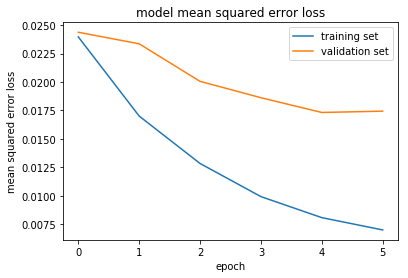

In [17]:


### print the keys contained in the history object
print(history_object.history.keys())

### plot the training and validation loss for each epoch
plt.plot(history_object.history['loss'])
plt.plot(history_object.history['val_loss'])

plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')

#plt.savefig("Loss_NVidia_6.png")
plt.savefig("Final_Loss_NVidia_{0}.png".format(num_epochs))
plt.show()
